# Accelerating Computer Vision with Parallel Programming

By: Gian Batayola

<img src="https://www.egr.msu.edu/~aalessio/figs/midi_logo_highres_wName.png" width="70%">

---
# Abstract

In May of 2020, I joined the Medical Imaging and Data integration (MIDI) Lab here at MSU. The lab specializes in the application of computer vision and machine learning for the medical field. This is especially useful for imaging purposes like PET and X-ray scans that require diagnosis. Through our efforts, the MIDI Lab hopes to increase the efficiency of healthcare delivery by providing targeted and precise analysis. 

One of the first tasks I was assigned to do at the lab was an exploration of the scikit-learn library and to familiarize myself with all the different machine learning classifiers and tools it provided. If a model is configured to calculate the most accurate results, which usually entails having many iterations over a large number of samples, it can take upwards of hours to complete execution. 

My goal with this project is to assess how parallelization on the HPCC, specifically with CUDA and the GPU, influences the speed of machine learning models and if it is worthwhile to introduce to my lab.

A preexisting project called "MedMNIST" will be the base of this study as it already makes good use of PyTorch's neural networks and CUDA integration.


---
# Methodology

For this project, we will perform an analysis on different serial and parallel options across different datasets and resource allocations scheduled with SLURM. 

In this particular study, we will perform our tests on BreastMNIST, the smallest dataset. For serial tests, we can test on different number of cores. For parallel tests, we can test on different number of GPUs. The original MedMNIST program is set to only use one GPU, so modifications have been made so it can use all available GPUs and also parallelize the model training process. We will set cores/GPUs to 1, 3, 5, and 7 for testing. Each test will run for 10 epochs, which are essentially iterative learning phases. Although though our focus is on speed and not accuracy, we still want to be in a research mindset and produce quality results that could be usable for a lab. That configuration can provide that. Additionally, to account for variability, each test will be run 3 times. Time will be extracted from the SLURM output and converted into seconds before being recorded into an Excel file.

Other extraneous settings are 1 node and 4GB memory for every job with 90 minutes time for serial jobs or 30 minutes time for parallel jobs. There will be a separate job submissions for serial and parallel, `s_timing.sh` and `p_timing.sh` respectively.

All testing was done on dev-intel-16-k80. 

---
# Timing Results

Here is the table of the collected data:

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
data = pd.read_csv('BreastMNIST-study.csv')
data

configuration  run 1 real time  run 1 test accuracy  run 2 real time  \
0     CPU 1 core          692.168              0.82051          729.654   
1    CPU 3 cores          136.424              0.80128          130.755   
2    CPU 5 cores           91.173              0.80769           87.922   
3    CPU 7 cores          150.353              0.80769          142.346   
4   GPU 1 device           24.420              0.81410           27.250   
5  GPU 3 devices           25.417              0.80769           25.417   
6  GPU 5 devices           27.381              0.83333           27.049   
7  GPU 7 devices           47.839              0.81410           34.717   

   run 2 test accuracy  run 3 real time  run 3 test accuracy  \
0              0.80769          787.324              0.82051   
1              0.83333          129.278              0.82051   
2              0.75641           87.877              0.82692   
3              0.80769          144.168              0.80128   
4              0.80128           27.297              0.82692   
5              0.83333           21.739              0.82692   
6              0.80769           26.334              0.81410   
7              0.76923           35.809              0.85256   

   average real time  average test accuracy  
0         736.382000               0.816237  
1         132.152333               0.818373  
2          88.990667               0.797007  
3         145.622333               0.805553  
4          26.322333               0.814100  
5          24.191000               0.822647  
6          26.921333               0.818373  
7          39.455000               0.811963

In [29]:
serial_data = data.iloc[:4]
parallel_data = data.iloc[4:]

## Serial Study

In [31]:
serial_data

configuration  run 1 real time  run 1 test accuracy  run 2 real time  \
0    CPU 1 core          692.168              0.82051          729.654   
1   CPU 3 cores          136.424              0.80128          130.755   
2   CPU 5 cores           91.173              0.80769           87.922   
3   CPU 7 cores          150.353              0.80769          142.346   

   run 2 test accuracy  run 3 real time  run 3 test accuracy  \
0              0.80769          787.324              0.82051   
1              0.83333          129.278              0.82051   
2              0.75641           87.877              0.82692   
3              0.80769          144.168              0.80128   

   average real time  average test accuracy  
0         736.382000               0.816237  
1         132.152333               0.818373  
2          88.990667               0.797007  
3         145.622333               0.805553

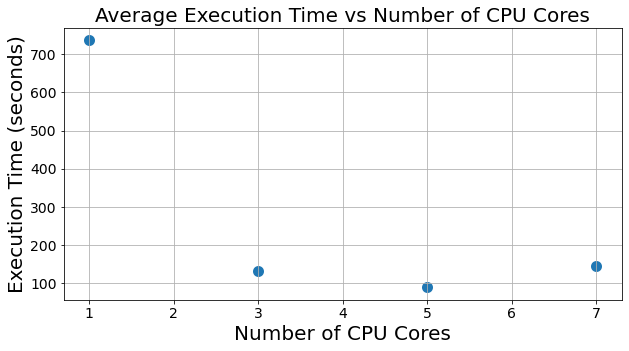

In [116]:
plt.figure(figsize = (10,5))

plt.scatter([1,3,5,7],serial_data['average real time'], linewidths = 5)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.title('Average Execution Time vs Number of CPU Cores', fontsize = 20)
plt.xlabel('Number of CPU Cores', fontsize = 20)
plt.ylabel('Execution Time (seconds)', fontsize = 20)

plt.grid()

As we can see, adding cores speeds up serial execution time significantly. The reduction in time from 1 core to 3 cores is significant. However, adding more beyond that seems to have diminishing returns as having 5 cores is only slightly better than having 3. Going beyond that, having 7 cores actually seems to be worse than having either 3 or 5.

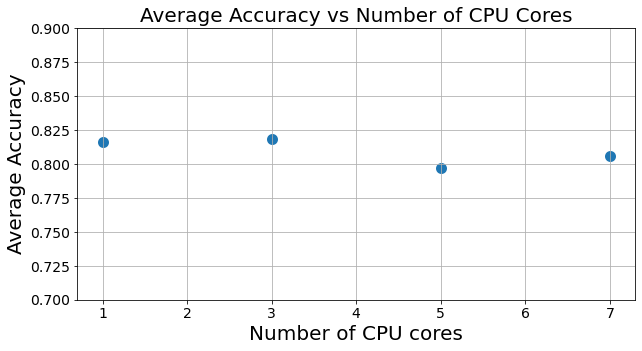

In [114]:
plt.figure(figsize = (10,5))

plt.scatter([1,3,5,7],serial_data['average test accuracy'], linewidths = 5)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.title('Average Accuracy vs Number of CPU Cores', fontsize = 20)
plt.xlabel('Number of CPU cores', fontsize = 20)
plt.ylabel('Average Accuracy', fontsize = 20)

plt.ylim(0.7,0.9)

plt.grid()

As we increase number of cores, the accuracy of the model stays relatively constant, meaning that we can achieve high speed without needing to sacrifice accuracy.

## Parallel Study

In [61]:
parallel_data

configuration  run 1 real time  run 1 test accuracy  run 2 real time  \
4   GPU 1 device           24.420              0.81410           27.250   
5  GPU 3 devices           25.417              0.80769           25.417   
6  GPU 5 devices           27.381              0.83333           27.049   
7  GPU 7 devices           47.839              0.81410           34.717   

   run 2 test accuracy  run 3 real time  run 3 test accuracy  \
4              0.80128           27.297              0.82692   
5              0.83333           21.739              0.82692   
6              0.80769           26.334              0.81410   
7              0.76923           35.809              0.85256   

   average real time  average test accuracy  
4          26.322333               0.814100  
5          24.191000               0.822647  
6          26.921333               0.818373  
7          39.455000               0.811963

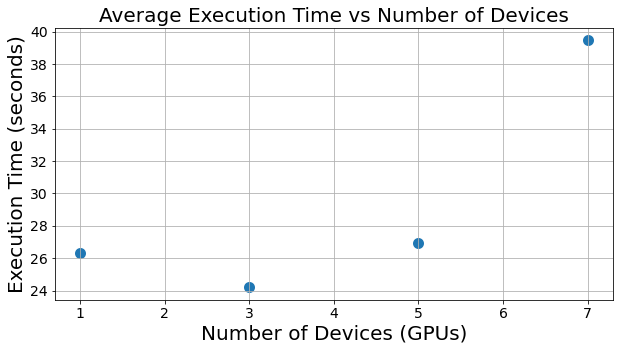

In [115]:
plt.figure(figsize = (10,5))

plt.scatter([1,3,5,7],parallel_data['average real time'], linewidths = 5)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.title('Average Execution Time vs Number of Devices', fontsize = 20)
plt.xlabel('Number of Devices (GPUs)', fontsize = 20)
plt.ylabel('Execution Time (seconds)', fontsize = 20)

plt.grid()

Even with just 1 GPU, the parallel solution is significantly faster than the best serial code. However, it seems like the parallel option experiences greater diminishing returns. There is very little improvement going from 1 to 3 GPUs and it seems like performance gets worse as more devices are added. 7 is much slower compared to the other trials. It is possible that the memory allocation introduces so much overhead to the model that it's not worth using anymore. It is still much faster than serial execution.

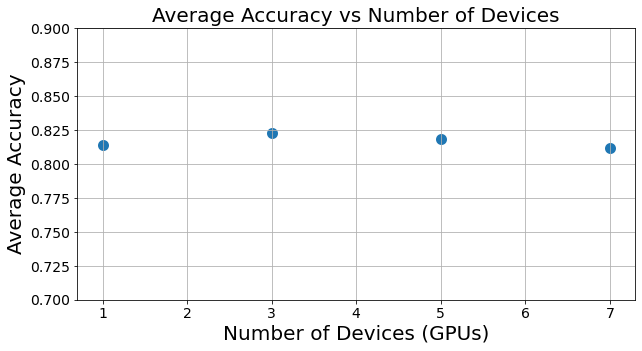

In [117]:
plt.figure(figsize = (10,5))

plt.scatter([1,3,5,7],parallel_data['average test accuracy'], linewidths = 5)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.title('Average Accuracy vs Number of Devices', fontsize = 20)
plt.xlabel('Number of Devices (GPUs)', fontsize = 20)
plt.ylabel('Average Accuracy', fontsize = 20)

plt.ylim(0.7,0.9)

plt.grid()

Just like we saw in the serial execution, we can increase speed without sacrificing accuracy.

---
# Concluding Discussion and Future Work

In conclusion, GPU parallelization provides a significant performance boost to machine learning models. The best GPU time was 3.68 times faster than the best CPU code. While it is no surprise that parallel code significantly outspeeds the serial code, the more nuanced details are very interesting. From the graphs we note that using just one core for the serial code is a severe underutilization of resources. We need at least a few cores to get decent times with that program. Whereas the parallel code only needs one GPU to achieve top performance, almost like a binary. You either get GPU speedup or you don't.

This has interesting implications on requesting SLURM jobs.  Anecdotally I noticed that requesting increasingly larger amounts of cores or devices would take longer to queue than a job that just needed 1 GPU. In fact, jobs that used a 1:1:1 setup (1 node, 1 core, 1 GPU) would run almost instantly. It is possible that the number of people on the dev node could have influenced this, but I think the small use of resources may have played a role in that. 

In a sense, not only is GPU parallelization good for time, but it is also very cost-efficient. I have reason to believe that having 10, 15, or even 20 or more CPU cores won't be able to match the power of one GPU. If that's all it takes to get a significant improvement in performance, then it might be worthwhile to try incorporating it into my future research studies. 

If this study were to continue, the next step would be to identify the cause of the diminishing returns when more cores/devices are requested and removing that handicap. Perhaps this is only a problem for smaller datasets? Maybe the additional overhead might be justifiable when training and testing on a very large sample size.

---
# References

https://stackoverflow.com/questions/54216920/how-to-use-multiple-gpus-in-pytorch


https://pytorch.org/tutorials/beginner/former_torchies/parallelism_tutorial.html

https://medmnist.github.io/

-----
### Congratulations, you are done!

Now, you just need to create a second directory in your git repository and include your report as an md or ipynb file in the directory along with any additional figures and files needed to reproduce the results.  You instructor should already have your git repository and be able to pull in your changes. 

Written by Dr. Dirk Colbry, Michigan State University
<a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.

----